In [18]:
from bs4 import BeautifulSoup
from collections import defaultdict
from sklearn.datasets import load_boston
import math
import matplotlib.pyplot as plt
import networkx as nx
import random
import re
import requests

%matplotlib inline

In [19]:
data = load_boston()

In [20]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [21]:
X, y = data['data'], data['target']

In [22]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [24]:
y[1]

21.6

In [25]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [26]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [27]:
import random

In [28]:
def draw_rm_and_price():
    plt.tick_params(colors='white')
    plt.scatter(X[:, 5], y)

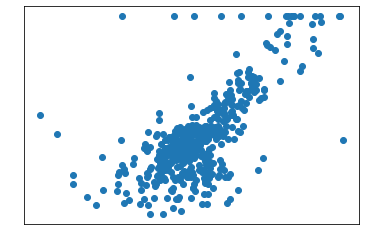

In [29]:
draw_rm_and_price()

In [30]:
def price(rm, k, b):
    return k * rm + b

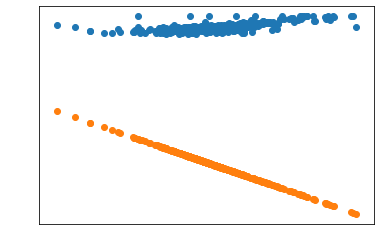

In [31]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### 1.4 不同的Loss

In [32]:
def loss(y, y_hat):
    # 误差绝对值之和
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))
    # 误差平方差之和
#     return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [33]:
X_rm = X[:, 5]

### 1.1 Random Choose Method to get optimal k and b

In [34]:
# Random Choose Method to get optimal k and b

trying_times = 10000
min_loss = float('inf')
best_k, best_b = None, None
for i in range(trying_times):
    k = random.random() * 200 -100
    b = random.random() * 200 -100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is: {}, get best_k: {}, best_b: {}, and the loss is: {}.'.format(i, best_k, best_b, current_loss))

When time is: 0, get best_k: -78.73490659563012, best_b: -77.22489854218388, and the loss is: 594.577806342122.
When time is: 1, get best_k: -72.82019739658963, best_b: 35.20287495712438, and the loss is: 444.97824801933814.
When time is: 2, get best_k: -42.289694833602894, best_b: 46.46545473256188, and the loss is: 241.8426219734223.
When time is: 3, get best_k: -16.454073414040636, best_b: -63.75812861864092, and the loss is: 189.69877053264207.
When time is: 6, get best_k: 13.100061091804236, best_b: -13.757594415280579, and the loss is: 46.03869367457076.
When time is: 66, get best_k: 0.9234913660977924, best_b: 31.178111254860596, and the loss is: 15.584209851356832.
When time is: 95, get best_k: 17.195191507386596, best_b: -94.2926993182688, and the loss is: 9.966746370467106.
When time is: 190, get best_k: 9.937741925434423, best_b: -48.424058292586494, and the loss is: 9.238770787990829.
When time is: 349, get best_k: 16.388429048822587, best_b: -86.39150571256802, and the los

### 1.2 Supervised Direction to get optimal k and b

In [35]:
# Supervised Direction to get optimal k and b

trying_times = 10000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print('When time is: {}, get best_k: {}, best_b: {}, and the loss is: {}.'.format(i, best_k, best_b, current_loss))
    else:
        next_direction = random.choice(direction)

When time is: 0, get best_k: -11.471168462343835, best_b: -35.58568737582198, and the loss is: 130.2105934814841.
When time is: 1, get best_k: -11.371168462343835, best_b: -35.48568737582198, and the loss is: 129.48213004274868.
When time is: 2, get best_k: -11.271168462343836, best_b: -35.38568737582198, and the loss is: 128.7536666040137.
When time is: 3, get best_k: -11.171168462343836, best_b: -35.28568737582198, and the loss is: 128.02520316527836.
When time is: 4, get best_k: -11.071168462343836, best_b: -35.18568737582198, and the loss is: 127.29673972654317.
When time is: 5, get best_k: -10.971168462343837, best_b: -35.085687375821976, and the loss is: 126.56827628780805.
When time is: 6, get best_k: -10.871168462343837, best_b: -34.985687375821975, and the loss is: 125.83981284907283.
When time is: 7, get best_k: -10.771168462343837, best_b: -34.88568737582197, and the loss is: 125.1113494103377.
When time is: 8, get best_k: -10.671168462343838, best_b: -34.78568737582197, and

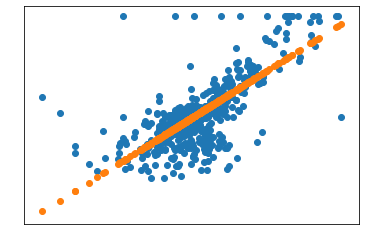

In [36]:
X_rm = X[:, 5]
k = 10
b = -40
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### 2. Answer following questions:

#### 2.1 Why do we need machine learning methods instead of creating a complicated formula?
Ans: 机器学习可以根据数据习得规则，更适应场景的变化，而复杂的逻辑在规则发生改变时需要人工修改逻辑。

#### 2.2 Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans: 第一种随机选择的方法不稳定，需要大量的尝试次数。

#### 2.3 Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?
Ans: 从稳定性上来看，优于随机选择的方法，但是速度较慢。

#### 2.4 Why do we use Derivative / Gredient to fit a target function?
Ans: 使用导数或梯度可以每次都向着更优化的方向前进。

#### 2.5 In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans: 

#### 2.6 What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans: 

#### 2.7 Using the simple words to describe: What's the machine leanring.
Ans: 机器学习根据已有的数据，生成一个函数，再用这个函数做数据的分析

#### 获取站点坐标及站点间连接关系图

In [37]:
url = 'https://map.bjsubway.com/subwaymap/beijing.xml'
response = requests.get(url, verify=False)
response.encoding = 'utf-8'
soup = BeautifulSoup(response.text, 'lxml')

# get map info of station and location
station_location = defaultdict(list)

for line in soup.find_all('p'):
    if line.get('lb') != '':
        station_location[line.get('lb')] = [line.get('x'), line.get('y')]

# get map info of connection of the stations
station_connection = defaultdict(list)

for line in soup.find_all('l'):
    stations = []
    for station_pre in line.find_all('p'):
        if station_pre.get('lb') != '':
            stations.append(station_pre.get('lb'))
    for station in stations:
        idx = stations.index(station)
        num = len(stations)
        if 0 == idx:
            station_connection[station] += [stations[idx+1]]
        elif (num-1) == idx:
            station_connection[station] += [stations[idx-1]]
        else:
            station_connection[station] += [stations[idx+1]] + [stations[idx-1]]

C:\Users\zhuhaijun\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [70]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for station in successors:
            if station in path: continue
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)

#### 获取从A站到B站经过的站点，由于没有取得合适的坐标（上面获取的location不正确），所以没有画图

In [71]:
search('五棵松', '回龙观东大街', station_connection)

['五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '白堆子',
 '白石桥南',
 '国家图书馆',
 '动物园',
 '西直门',
 '大钟寺',
 '知春路',
 '五道口',
 '上地',
 '西二旗',
 '龙泽',
 '回龙观',
 '霍营',
 '回龙观东大街']

#### 获取站点间间距，路程最短优先代码待补充

In [73]:
url = 'https://www.bjsubway.com/station/zjgls/'
response = requests.get(url, verify=False)
response.encoding = 'gb2312'
soup = BeautifulSoup(response.text, 'lxml')

station_distance = defaultdict(list)

for content in soup.select('tbody'):
    for tr in content.select('tr'):
        station_pattern = re.compile(r'\[<th>(\w+)――(\w+)</th>]')
        stations = station_pattern.findall(str(tr.select('th')))[0]
        distance_pattern = re.compile(r'\[<td.*>(\d+)</td>')
        distance = distance_pattern.findall(str(tr.select('td')))
        station_distance[stations] = distance[0]

C:\Users\zhuhaijun\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [74]:
station_distance

defaultdict(list,
            {('苹果园', '古城'): '2606',
             ('古城', '八角游乐园'): '1921',
             ('八角游乐园', '八宝山'): '1953',
             ('八宝山', '玉泉路'): '1479',
             ('玉泉路', '五棵松'): '1810',
             ('五棵松', '万寿路'): '1778',
             ('万寿路', '公主坟'): '1313',
             ('公主坟', '军事博物馆'): '1172',
             ('军事博物馆', '木樨地'): '1166',
             ('木樨地', '南礼士路'): '1291',
             ('南礼士路', '复兴门'): '424',
             ('复兴门', '西单'): '1590',
             ('西单', '天安门西'): '1217',
             ('天安门西', '天安门东'): '925',
             ('天安门东', '王府井'): '852',
             ('王府井', '东单'): '774',
             ('东单', '建国门'): '1230',
             ('建国门', '永安里'): '1377',
             ('永安里', '国贸'): '790',
             ('国贸', '大望路'): '1385',
             ('大望路', '四惠'): '1673',
             ('四惠', '四惠东'): '1715',
             ('西直门', '车公庄'): '909',
             ('车公庄', '阜成门'): '960',
             ('阜成门', '复兴门'): '1832',
             ('复兴门', '长椿街'): '1234',
             ('长椿街', '宣